In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
life_expectancy_path = "../life_expectancy.csv"

life_expectancy_data = pd.read_csv(life_expectancy_path)

life_expectancy_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
style_dict = {
    "Mean": "{:.2f}", 
    "Median": "{:.2f}",
    "Variance": "{:.2f}", 
    "Standard Deviation": "{:.2f}",
    "Standard Error": "{:.2f}", 
    "mean": "{:.2f}",
    "median": "{:.2f}",
    "var": "{:.2f}",
    "std": "{:.2f}",
    "sem":"{:.2f}",
    'GDP': "{:.3f}",
    "percentage expenditure": "{:.2f}",
}

In [4]:
life_exp_df = life_expectancy_data.copy()

In [5]:
life_exp_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
len(life_exp_df["Country"].unique())

# 193 Countries

193

In [7]:
reduced_df = life_exp_df[['Country', 'Year', 'Status', 'Life expectancy ',
       'Alcohol', ' BMI ', 'Total expenditure','GDP', 'Population',
       'Income composition of resources', 'Schooling']].copy()

reduced_df.columns = [col.strip() for col in reduced_df.columns]

#reduced_df

In [8]:
drop_countries = ['San Marino', 'Marshall Islands', 'Cook Islands', 'Saint Kitts and Nevis', 'Niue', 'Palau', 'Dominica', 'Monaco', 'Nauru',
                  'Tuvalu']

for country in drop_countries:
    reduced_df.drop(reduced_df[reduced_df['Country'] == country].index, inplace=True)
    
#reduced_df['Country'].value_counts() #all 16
#183 countries

In [9]:
# is_NaN = reduced_df.isnull()
# reduced_row_has_NaN = is_NaN.any(axis=1)
# reduced_rows_with_NaN = reduced_df[reduced_row_has_NaN]
# # print(reduced_rows_with_NaN)

# reduced_rows_with_NaN.groupby("Country").count()

In [10]:
# drop_NaN_country = (reduced_rows_with_NaN["Country"].unique())
# len(drop_NaN_country)

# # 181 countries with incomplete data

In [11]:
reduced_df.head()

,Country,Year,Status,Life expectancy,Alcohol,BMI,Total expenditure,GDP,Population,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,0.01,19.1,8.16,584.259210,33736494.0,0.479,10.1
1,Afghanistan,2014,Developing,59.9,0.01,18.6,8.18,612.696514,327582.0,0.476,10.0
2,Afghanistan,2013,Developing,59.9,0.01,18.1,8.13,631.744976,31731688.0,0.470,9.9
3,Afghanistan,2012,Developing,59.5,0.01,17.6,8.52,669.959000,3696958.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,0.01,17.2,7.87,63.537231,2978599.0,0.454,9.5


In [12]:
reduced_df.groupby("Country")['Schooling'].count()

#183 countries

Country
Afghanistan                           16
Albania                               16
Algeria                               16
Angola                                16
Antigua and Barbuda                   16
                                      ..
Venezuela (Bolivarian Republic of)    16
Viet Nam                              16
Yemen                                 16
Zambia                                16
Zimbabwe                              16
Name: Schooling, Length: 183, dtype: int64

In [13]:
reduced_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Alcohol', 'BMI',
       'Total expenditure', 'GDP', 'Population',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [14]:
school_df = reduced_df[['Country', 'Year','Status','Life expectancy','BMI', 'GDP', 'Schooling']]

school_df

,Country,Year,Status,Life expectancy,BMI,GDP,Schooling
0,Afghanistan,2015,Developing,65.0,19.1,584.259210,10.1
1,Afghanistan,2014,Developing,59.9,18.6,612.696514,10.0
2,Afghanistan,2013,Developing,59.9,18.1,631.744976,9.9
3,Afghanistan,2012,Developing,59.5,17.6,669.959000,9.8
4,Afghanistan,2011,Developing,59.2,17.2,63.537231,9.5
...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,27.1,454.366654,9.2
2934,Zimbabwe,2003,Developing,44.5,26.7,453.351155,9.5
2935,Zimbabwe,2002,Developing,44.8,26.3,57.348340,10.0
2936,Zimbabwe,2001,Developing,45.3,25.9,548.587312,9.8


### According to CDC:
#### BMI is '18.5' to '24.9'= normal or Healthy Weight range
#### BMI is '25.0 to 29.9', = the overweight range. 
#### BMI is '30.0 or higher', = the obese range."

In [15]:
drop_countries_schooling = ['Czechia',"Côte d'Ivoire","Democratic People's Republic of Korea", 
                            "Democratic Republic of the Congo", "Republic of Korea", "Republic of Moldova", "Somalia",
                            "United Kingdom of Great Britain and Northern Ireland","United Republic of Tanzania",
                            "United States of America"]

for country in drop_countries_schooling:
    school_df.drop(school_df[school_df['Country'] == country].index, inplace=True)

/Users/abdurrabbwatkins/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Dropped 10 Countries - missing schooling data
#### Czechia, Côte d'Ivoire, Democratic People's Republic of Korea, Democratic Republic of the Congo, Republic of Korea, Republic of Moldova, Somalia, United Kingdom of Great Britain and Northern Ireland, United Republic of Tanzania, United States of America

In [16]:
school_df.groupby("Country")['Schooling'].count()

#173 countries

Country
Afghanistan                           16
Albania                               16
Algeria                               16
Angola                                16
Antigua and Barbuda                   16
                                      ..
Venezuela (Bolivarian Republic of)    16
Viet Nam                              16
Yemen                                 16
Zambia                                16
Zimbabwe                              16
Name: Schooling, Length: 173, dtype: int64

In [17]:
school_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'BMI', 'GDP',
       'Schooling'],
      dtype='object')

In [18]:
school_mean = school_df.groupby("Country")["Schooling"].mean()
school_mean

Country
Afghanistan                            8.21250
Albania                               12.13750
Algeria                               12.71250
Angola                                 8.04375
Antigua and Barbuda                    8.84375
                                        ...   
Venezuela (Bolivarian Republic of)    12.78750
Viet Nam                              11.51250
Yemen                                  8.50625
Zambia                                11.21250
Zimbabwe                               9.82500
Name: Schooling, Length: 173, dtype: float64

In [19]:
life_exp_mean = school_df.groupby("Country")["Life expectancy"].mean()
life_exp_mean

Country
Afghanistan                           58.19375
Albania                               75.15625
Algeria                               73.61875
Angola                                49.01875
Antigua and Barbuda                   75.05625
                                        ...   
Venezuela (Bolivarian Republic of)    73.38750
Viet Nam                              74.77500
Yemen                                 63.86250
Zambia                                53.90625
Zimbabwe                              50.48750
Name: Life expectancy, Length: 173, dtype: float64

The correlation between average years in school and average life expectancy is 0.79


Text(0.5, 1.0, 'Fig. 1: Does More School = More Life?')

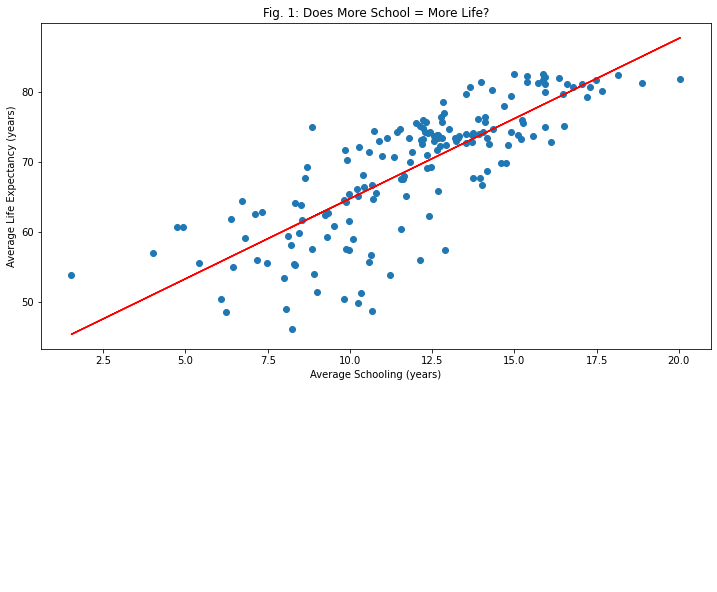

In [20]:
fig = plt.figure(figsize =(12, 6))

school_mean = school_df.groupby("Country")["Schooling"].mean()
school_mean

life_exp_mean = school_df.groupby("Country")["Life expectancy"].mean()
life_exp_mean

correlation_school_life = st.pearsonr(life_exp_mean,school_mean)
print(f"The correlation between average years in school and average life expectancy is {round(correlation_school_life[0],2)}")


x_values = school_mean
y_values = life_exp_mean
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="purple")
plt.xlabel("Average Schooling (years)")
plt.ylabel("Average Life Expectancy (years)")
plt.title("Fig. 1: Does More School = More Life?")

<AxesSubplot:>

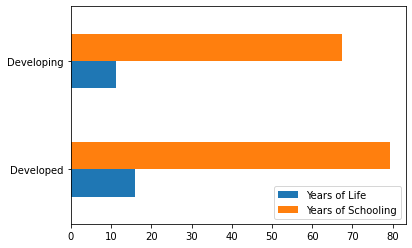

In [21]:
school_mean = school_df.groupby("Country")["Schooling"].mean()
school_mean

life_exp_mean = school_df.groupby("Country")["Life expectancy"].mean()
life_exp_mean

Life = list(school_df.groupby("Status")["Schooling"].mean())
School = list(school_df.groupby("Status")["Life expectancy"].mean())
index = ['Developed', 'Developing']
df = pd.DataFrame({'Years of Life': Life,
                    'Years of Schooling': School}, index=index)

ax = df.plot.barh()
ax


In [22]:
school_df.groupby("Country")['GDP'].mean()

Country
Afghanistan                            340.015425
Albania                               2119.726679
Algeria                               2847.853392
Angola                                1975.143045
Antigua and Barbuda                   9759.305728
                                         ...     
Venezuela (Bolivarian Republic of)            NaN
Viet Nam                                      NaN
Yemen                                         NaN
Zambia                                 811.811841
Zimbabwe                               410.980194
Name: GDP, Length: 173, dtype: float64

In [23]:
# school_agg = school_df.groupby("Country")["Schooling"].agg(['mean','median','std','var','sem'])
# #school_agg.style.format(style_dict)

In [24]:
school_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'BMI', 'GDP',
       'Schooling'],
      dtype='object')

In [25]:
school_df.groupby("Country")["GDP"].count()
#173 Countries

Country
Afghanistan                           16
Albania                               16
Algeria                               16
Angola                                16
Antigua and Barbuda                   16
                                      ..
Venezuela (Bolivarian Republic of)     0
Viet Nam                               0
Yemen                                  0
Zambia                                16
Zimbabwe                              16
Name: GDP, Length: 173, dtype: int64

In [26]:
GDP_df = school_df[school_df["GDP"].notna()]
GDP_df["GDP"]
# GDP_df.groupby("Country")["GDP"].count()

#157 countries

# is_NaN = reduced_df.isnull()
# reduced_row_has_NaN = is_NaN.any(axis=1)
# reduced_rows_with_NaN = reduced_df[reduced_row_has_NaN]
# # print(reduced_rows_with_NaN)

# reduced_rows_with_NaN.groupby("Country").count()

0       584.259210
1       612.696514
2       631.744976
3       669.959000
4        63.537231
           ...    
2933    454.366654
2934    453.351155
2935     57.348340
2936    548.587312
2937    547.358878
Name: GDP, Length: 2482, dtype: float64

In [27]:
GDP_mean = GDP_df.groupby("Country")["GDP"].mean()
GDP_mean

Country
Afghanistan             340.015425
Albania                2119.726679
Algeria                2847.853392
Angola                 1975.143045
Antigua and Barbuda    9759.305728
                          ...     
Uruguay                7192.584875
Uzbekistan              651.092359
Vanuatu                2000.245518
Zambia                  811.811841
Zimbabwe                410.980194
Name: GDP, Length: 157, dtype: float64

In [28]:
GDP_school_mean = GDP_df.groupby("Country")["Schooling"].mean()
GDP_school_mean

Country
Afghanistan             8.21250
Albania                12.13750
Algeria                12.71250
Angola                  8.04375
Antigua and Barbuda     8.84375
                         ...   
Uruguay                15.23125
Uzbekistan             11.64375
Vanuatu                10.56875
Zambia                 11.21250
Zimbabwe                9.82500
Name: Schooling, Length: 157, dtype: float64

The correlation between average years in school and average GDP is 0.61


Text(0.5, 1.0, 'Fig. 2: Does More School = Higher GDP?')

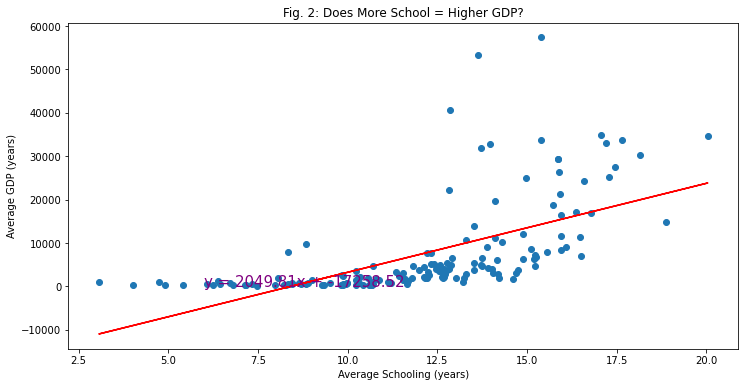

In [29]:
fig = plt.figure(figsize =(12, 6))

GDP_school_mean = GDP_df.groupby("Country")["Schooling"].mean()
GDP_school_mean

GDP_mean = GDP_df.groupby("Country")["GDP"].mean()
GDP_mean

# fig = plt.figure(figsize =(12, 6))

# school_life_line = plt.scatter(school_mean,life_exp_mean,color="blue")
# plt.ylabel("Average Life Expectancy (years)")
# plt.xlabel("Average Schooling (years)")
# plt.title("Fig. 1: Does More School = More Life?")

# Calculate the correlation coefficient for schooling and average life expectancy for 183 Countries
correlation_school_GDP = st.pearsonr(GDP_mean,GDP_school_mean)
print(f"The correlation between average years in school and average GDP is {round(correlation_school_GDP[0],2)}")


x_values = GDP_school_mean
y_values = GDP_mean
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="purple")
plt.xlabel("Average Schooling (years)")
plt.ylabel("Average GDP (years)")
plt.title("Fig. 2: Does More School = Higher GDP?")